# Music Recommender Engine


 ## *Spotify EDA*  
 
 <img src="spotify.png" align="left" width="200" height="200">

*Creating a Recommender Engine using features like danceability	energy key loudness, etc. from playlists extracted from Spotify using ***spotipy*** api*. 

### *FEATURES FROM THE DATASET*

***Danceability***: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

***Energy***: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

***Instrumentalness***: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

***Liveness***: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

***Loudness***: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.

***Speechiness***: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

***Tempo***: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

***Valence***: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
 

In [156]:
import sys
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [157]:
CLIENT_ID = "Your Client ID"
CLIENT_SECRET = "Your Client Secret"

In [158]:
token = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
cache_token = token.get_access_token()
sp = spotipy.Spotify(cache_token)

<ipython-input-158-535d6a9da87f>:2: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  cache_token = token.get_access_token()


In [159]:
sp.user_playlist_tracks("Siddharth", "14fd8khEbeU4JXLVCEfQh6")

{'href': 'https://api.spotify.com/v1/playlists/14fd8khEbeU4JXLVCEfQh6/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2019-05-21T00:37:09Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/31zjkre6wjwt7ji7cecmoyw5qmjq'},
    'href': 'https://api.spotify.com/v1/users/31zjkre6wjwt7ji7cecmoyw5qmjq',
    'id': '31zjkre6wjwt7ji7cecmoyw5qmjq',
    'type': 'user',
    'uri': 'spotify:user:31zjkre6wjwt7ji7cecmoyw5qmjq'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4GvEc3ANtPPjt1ZJllr5Zl'},
       'href': 'https://api.spotify.com/v1/artists/4GvEc3ANtPPjt1ZJllr5Zl',
       'id': '4GvEc3ANtPPjt1ZJllr5Zl',
       'name': 'Bazzi',
       'type': 'artist',
       'uri': 'spotify:artist:4GvEc3ANtPPjt1ZJllr5Zl'}],
     'available_markets': ['AD',
      'AE',
      'AR',
      'AT',
      'AU',
      'BE',
      'BG',
 

In [160]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [161]:
a = analyze_playlist("Siddharth", "14fd8khEbeU4JXLVCEfQh6")
b = analyze_playlist("Susanna Ketola", "4rnleEAOdmFAbRcNCgZMpY")
c = analyze_playlist("Rohan Shah", "2IIMkL8TDEYoPkcbXm3DG2")
d = analyze_playlist("Alex Butcher", "71vQTtv3Ey9TdIOgLVDPjw")
e = analyze_playlist("redmusiccompany", "3yhmzZlOnRMCFV7PuMFPKy")
f = analyze_playlist("Guardian Music", "3r6cJgDDlo6zgkfqJU9FVq")
g = analyze_playlist("Chinmay", "075XpeEIaG4dMRmXXZFjqI")
h = analyze_playlist("Spotify", "37i9dQZF1DWXRqgorJj26U")
i = analyze_playlist("Spotify", "37i9dQZF1DX6GJXiuZRisr")
j = analyze_playlist("Spotify", "37i9dQZF1DX2UgsUIg75Vg")
k = analyze_playlist("Spotify", "37i9dQZF1DX32NsLKyzScr")
l = analyze_playlist("Spotify", "37i9dQZF1DX1tW4VlEfDSS")
m = analyze_playlist("Spotify", "37i9dQZF1DWY12BqhkMFW2")
n = analyze_playlist("Spotify", "37i9dQZF1DWSRMdeGCgprt")

In [162]:
df = pd.concat([a,b,c,d,e,f,g,h,i,j,k,l,m,n], axis=0,ignore_index=True)

In [163]:
df

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Bazzi,COSMIC,Mine,7uzmGiiJyRfuViKKK3lVmR,0.710,0.789,4,-3.874,1,0.0722,2.77e-06,0.4510,0.717,142.929,131064,4
1,ZAYN,Mind Of Mine (Deluxe Edition),PILLOWTALK,0PDUDa38GO8lMxLCRc4lL1,0.584,0.700,11,-4.275,1,0.0456,0,0.0939,0.438,124.944,202747,4
2,Alex Aiono,Work The Middle,Work The Middle,42rB0s3mv8BpSKVBVkULvY,0.826,0.582,10,-7.162,0,0.2010,5.15e-06,0.1470,0.840,100.881,213112,4
3,Drake,More Life,Passionfruit,5mCPDVBb16L4XQwDdbRUpz,0.809,0.463,11,-11.377,1,0.0396,0.085,0.1090,0.364,111.980,298941,4
4,Charlie Puth,Voicenotes,Slow It Down,6TapyDFlRUlZ4cmIaqJx4k,0.733,0.754,0,-3.392,0,0.0593,0,0.1310,0.849,115.024,190053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,Coely,Don't Care,Don't Care,46rZy9ZED6Tz5SxA8C0qt6,0.605,0.625,8,-5.339,0,0.2140,0,0.1050,0.608,126.350,213700,4
1015,Chris Scholar,Moved to LA,Moved to LA,2kwL86tUFvBVHnJdETL760,0.655,0.562,1,-8.258,1,0.4000,0,0.1380,0.425,104.683,197611,4
1016,Ravyn Lenae,Moon Shoes EP,Recess,1e4CsgIIzrGpEVcjY95gZw,0.382,0.824,11,-4.060,1,0.2690,0.000211,0.6930,0.292,70.526,188280,4
1017,Durand Jones & The Indications,Durand Jones & The Indications,Smile,1ejUDxhwETwwVwbWMtWzpf,0.681,0.770,11,-8.000,0,0.0606,7.36e-05,0.4330,0.771,104.660,229404,4


### *Analyzing a Playlist*

In [164]:
My_Playlist = analyze_playlist("Siddharth", "14fd8khEbeU4JXLVCEfQh6")
My_Playlist

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Bazzi,COSMIC,Mine,7uzmGiiJyRfuViKKK3lVmR,0.710,0.789,4,-3.874,1,0.0722,0.000003,0.4510,0.717,142.929,131064,4
1,ZAYN,Mind Of Mine (Deluxe Edition),PILLOWTALK,0PDUDa38GO8lMxLCRc4lL1,0.584,0.700,11,-4.275,1,0.0456,0.000000,0.0939,0.438,124.944,202747,4
2,Alex Aiono,Work The Middle,Work The Middle,42rB0s3mv8BpSKVBVkULvY,0.826,0.582,10,-7.162,0,0.2010,0.000005,0.1470,0.840,100.881,213112,4
3,Drake,More Life,Passionfruit,5mCPDVBb16L4XQwDdbRUpz,0.809,0.463,11,-11.377,1,0.0396,0.085000,0.1090,0.364,111.980,298941,4
4,Charlie Puth,Voicenotes,Slow It Down,6TapyDFlRUlZ4cmIaqJx4k,0.733,0.754,0,-3.392,0,0.0593,0.000000,0.1310,0.849,115.024,190053,4
5,Charlie Puth,Cheating on You,Cheating on You,0ClPIeT6MSgfSgQ9ZrJbAq,0.749,0.535,4,-6.785,1,0.0336,0.000036,0.0982,0.601,123.042,196607,4
6,Chris Isaak,Heart Shaped World,Wicked Game,34u3Bj1KVxKWfA07yDJ2vG,0.661,0.300,9,-18.055,1,0.0294,0.011800,0.0839,0.359,112.327,289067,4
7,Pink Floyd,The Wall,Comfortably Numb,5HNCy40Ni5BZJFw1TKzRsC,0.472,0.366,11,-12.595,0,0.0286,0.308000,0.0837,0.171,127.167,382297,4
8,Alex Aiono,Work The Middle (Acoustic Version),Work The Middle - Acoustic,5DHvDSGFyNI02zDeQSJ07V,0.669,0.265,4,-9.018,0,0.0463,0.000000,0.1430,0.639,119.119,222922,5
9,William Singe,Fake Love,Fake Love,5GRAeHxQLh6GXPxlTZREWN,0.658,0.324,9,-10.894,0,0.4370,0.000000,0.0935,0.502,114.631,160183,4


In [165]:
import matplotlib.pyplot as plt

In [166]:
# Analyzing Aggregate Playlist Features after rescaling
features = My_Playlist[['danceability','energy','instrumentalness','liveness','loudness','speechiness','valence','tempo']]
features['loudness'] = -(features['loudness']/100)
features['tempo'] = features['tempo']/1000
features

<ipython-input-166-042eed0ae49e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['loudness'] = -(features['loudness']/100)
<ipython-input-166-042eed0ae49e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['tempo'] = features['tempo']/1000


,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0.710,0.789,0.000003,0.4510,0.03874,0.0722,0.717,0.142929
1,0.584,0.700,0.000000,0.0939,0.04275,0.0456,0.438,0.124944
2,0.826,0.582,0.000005,0.1470,0.07162,0.2010,0.840,0.100881
3,0.809,0.463,0.085000,0.1090,0.11377,0.0396,0.364,0.111980
4,0.733,0.754,0.000000,0.1310,0.03392,0.0593,0.849,0.115024
5,0.749,0.535,0.000036,0.0982,0.06785,0.0336,0.601,0.123042
6,0.661,0.300,0.011800,0.0839,0.18055,0.0294,0.359,0.112327
7,0.472,0.366,0.308000,0.0837,0.12595,0.0286,0.171,0.127167
8,0.669,0.265,0.000000,0.1430,0.09018,0.0463,0.639,0.119119
9,0.658,0.324,0.000000,0.0935,0.10894,0.4370,0.502,0.114631


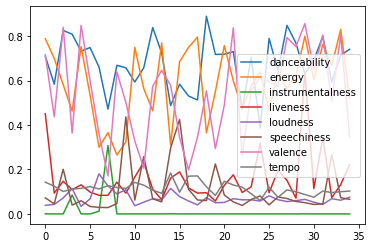

In [167]:
features.plot()

In [168]:
print('1) MAX FEATURES:\n', features.max(),'\n')
print('2) MEAN FEATURES:\n', features.mean(),'\n')
print('3) MIN FEATURES:\n', features.min(), '\n')

1) MAX FEATURES:
 danceability        0.890000
energy              0.831000
instrumentalness    0.308000
liveness            0.640000
loudness            0.180550
speechiness         0.437000
valence             0.857000
tempo               0.184112
dtype: float64 

2) MEAN FEATURES:
 danceability        0.675714
energy              0.588829
instrumentalness    0.011615
liveness            0.160157
loudness            0.069797
speechiness         0.106449
valence             0.542971
tempo               0.114495
dtype: float64 

3) MIN FEATURES:
 danceability        0.387000
energy              0.265000
instrumentalness    0.000000
liveness            0.057900
loudness            0.033920
speechiness         0.028600
valence             0.171000
tempo               0.059989
dtype: float64 



*- This playlist suggests that the user likes music that has a high danceability and energy along with songs which have a high tempo.*

*- Valence suggests if the user has a positive outlook or negative outlook to music.* 

*- In this case the user likes music that is more positive and livelier.*

*- Loudness values in this playlist suggests that the user likes softer music.*

**All these features can really help generate personalized recommendations to users.**